In [ ]:
import pandas as pd
df=pd.read_csv('/content/diabetes_dataset.csv')
print(df)

      Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference  HipCircumference   WHR  \
0       

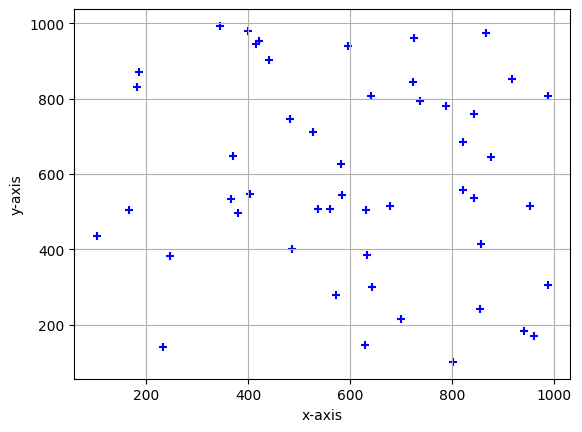

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x=np.random.randint(100,1000,50)
y=np.random.randint(100,1000,50)
plt.scatter(x,y,marker='+',color='blue')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()

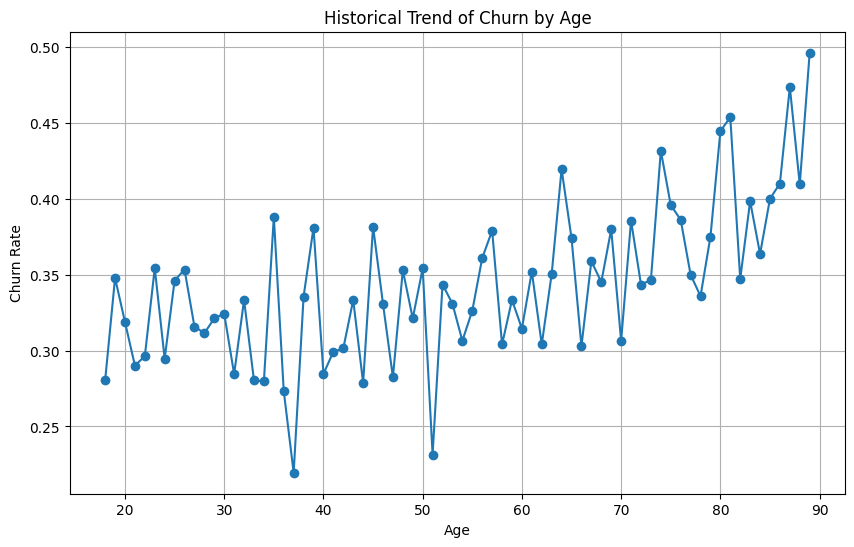

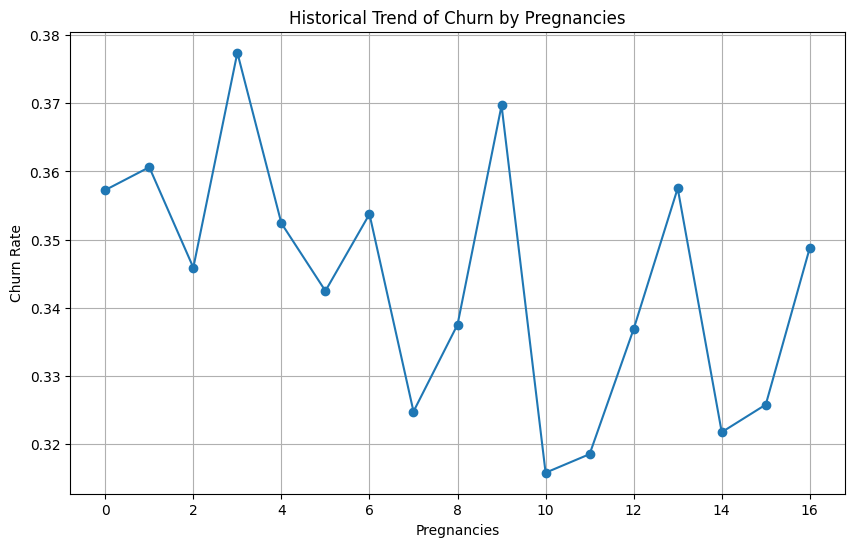

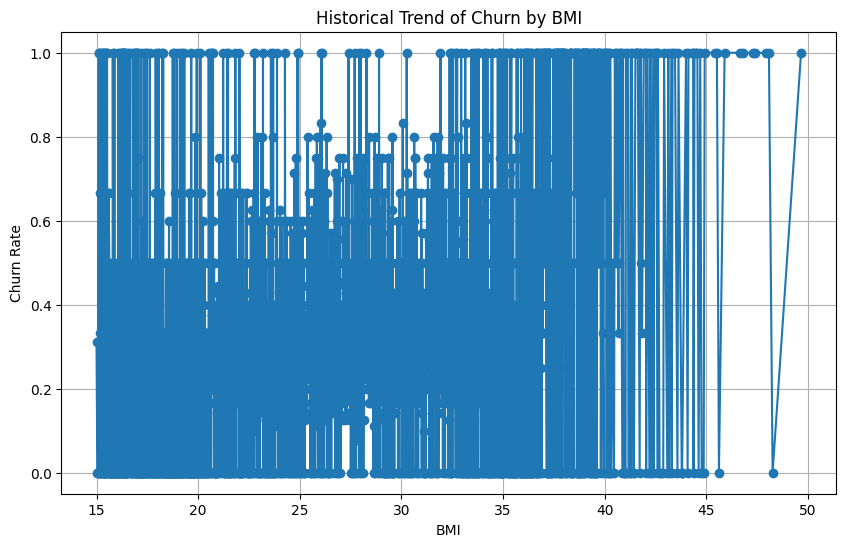

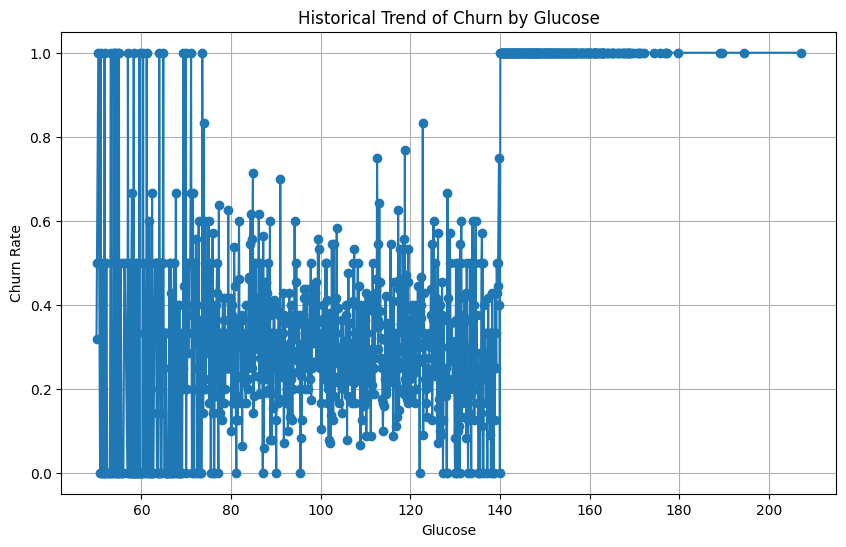

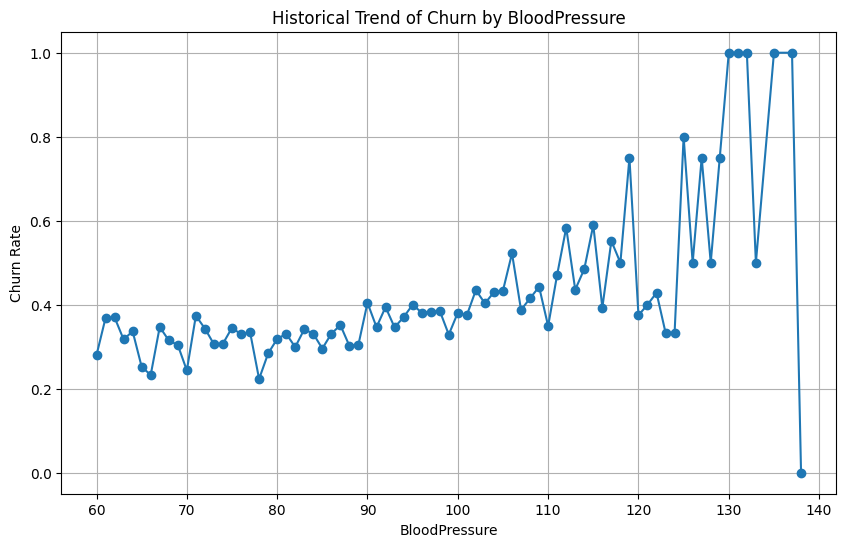

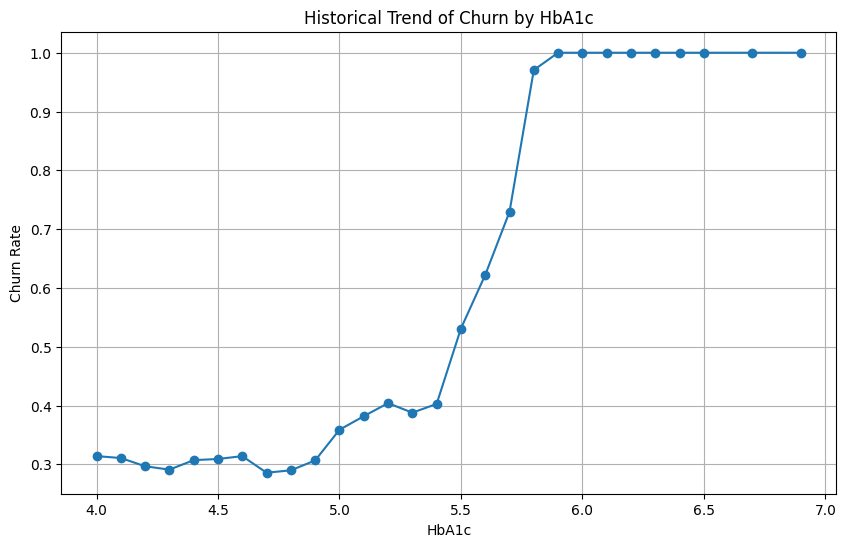

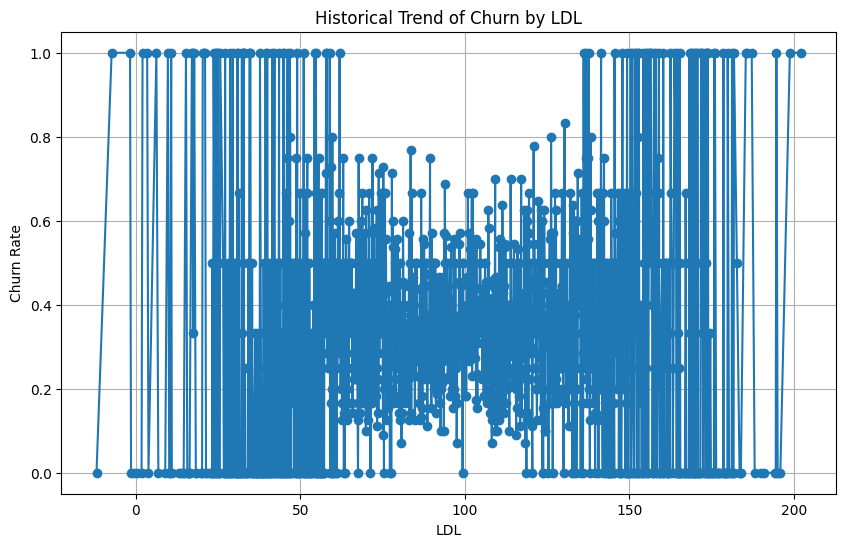

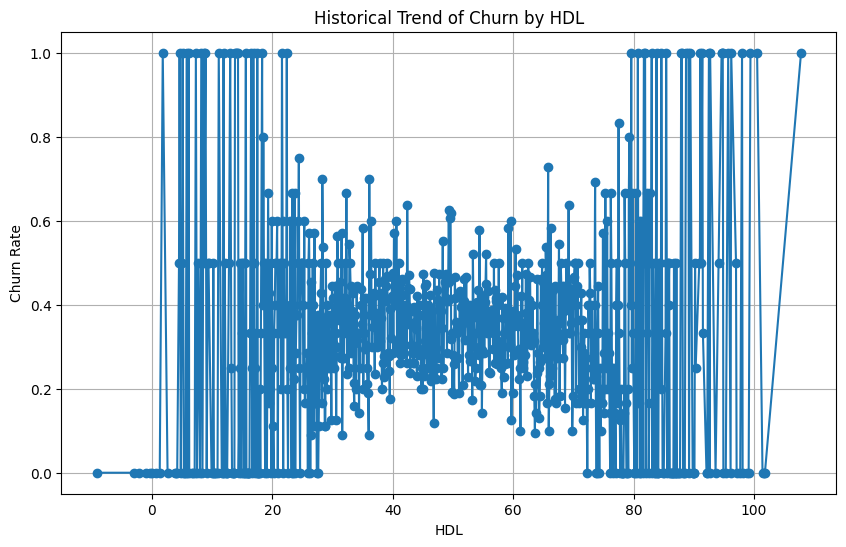

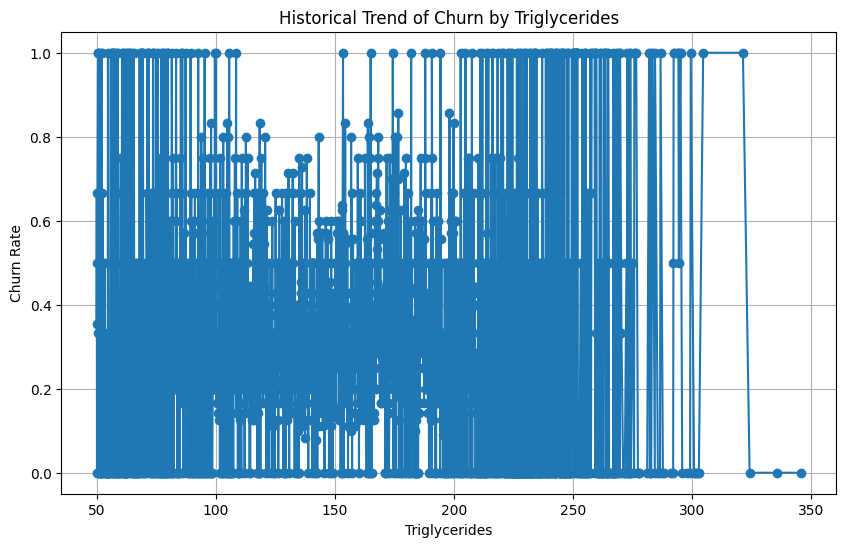

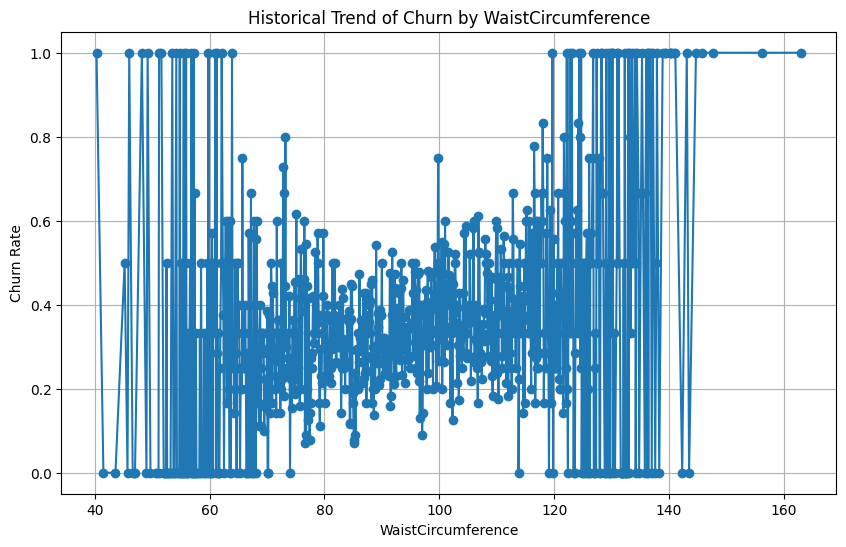

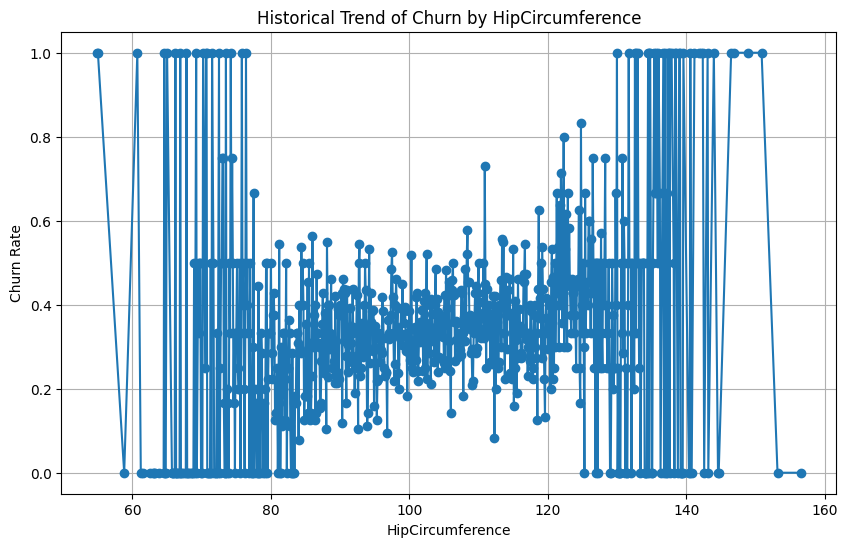

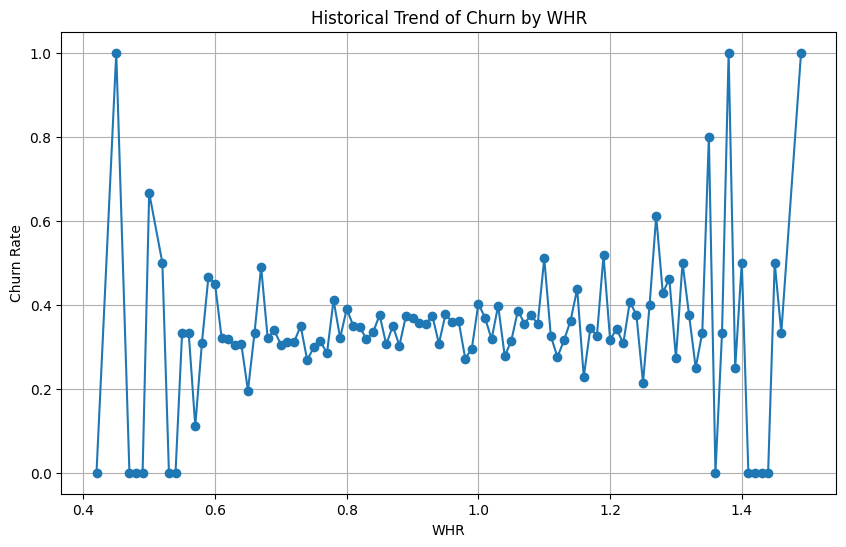

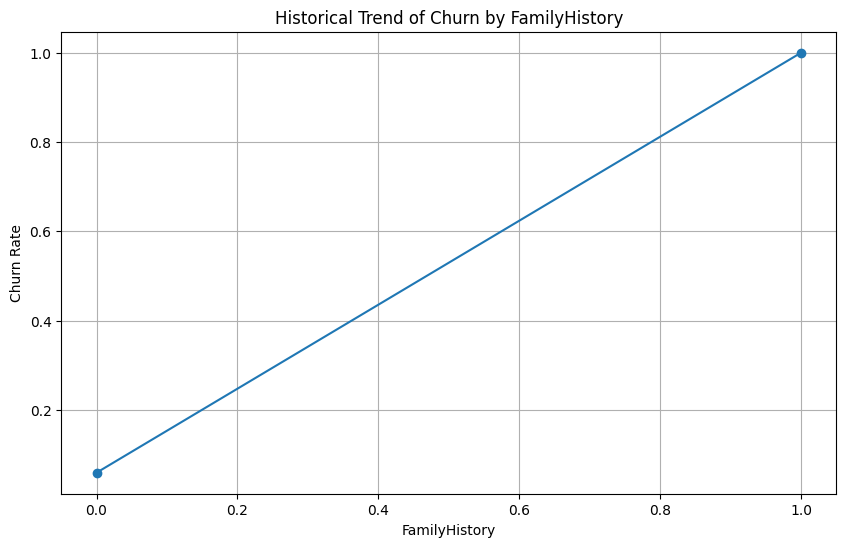

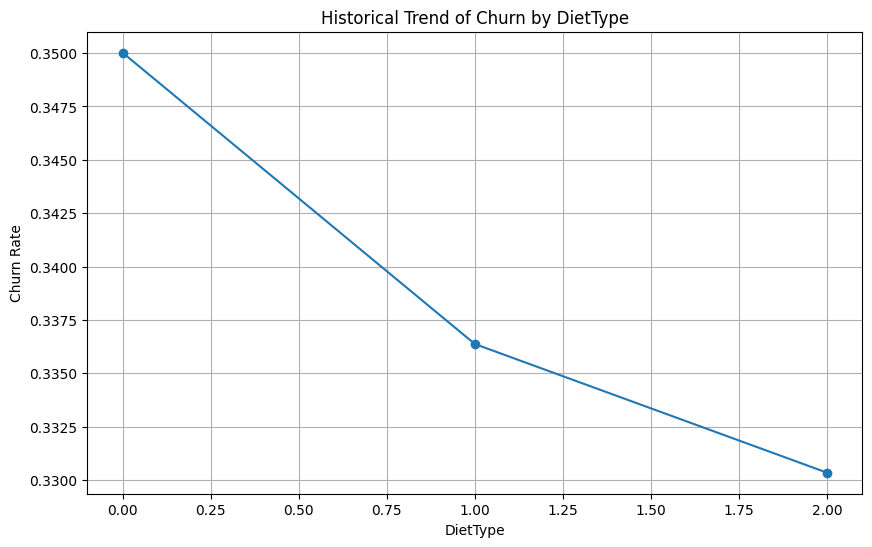

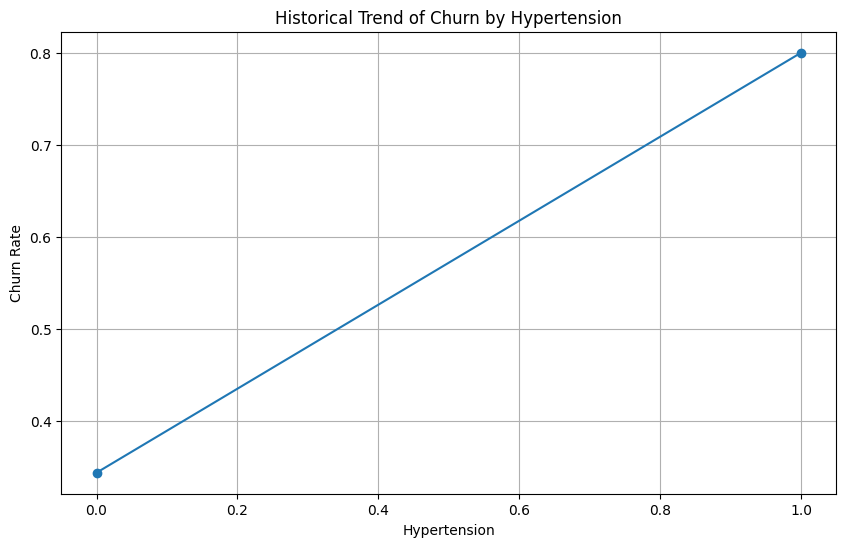

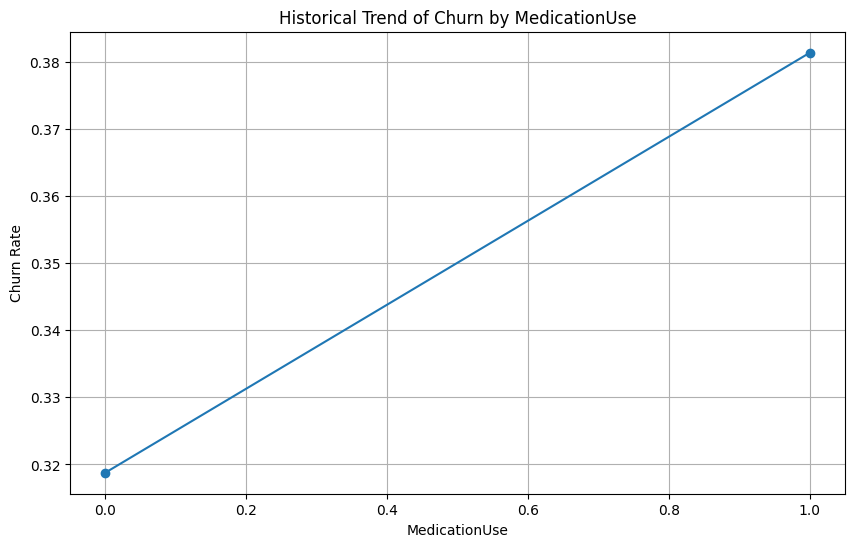

In [ ]:
#historical graph
numerical_features = ['Age', 'Pregnancies','BMI','Glucose','BloodPressure','HbA1c','LDL','HDL','Triglycerides','WaistCircumference','HipCircumference','WHR','FamilyHistory','DietType','Hypertension','MedicationUse']
for feature in numerical_features:
    churn_by_feature = df.groupby(feature)['Outcome'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.plot(churn_by_feature[feature], churn_by_feature['Outcome'], marker='o', linestyle='-')
    plt.title(f'Historical Trend of Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Churn Rate')
    plt.grid(True)
    plt.show()

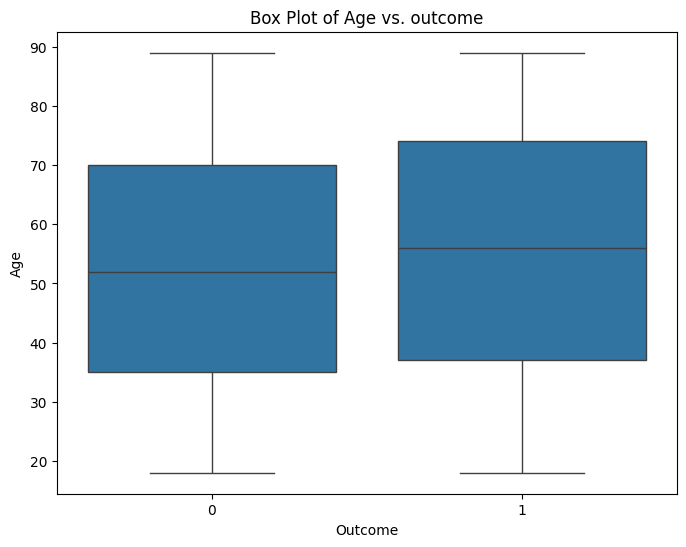

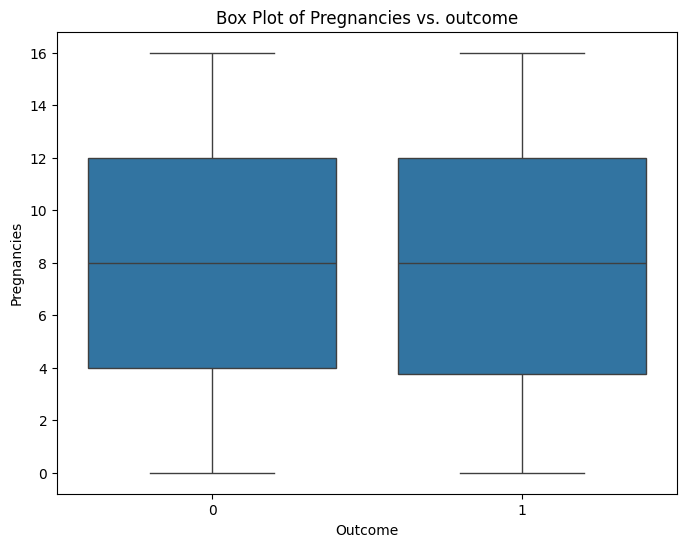

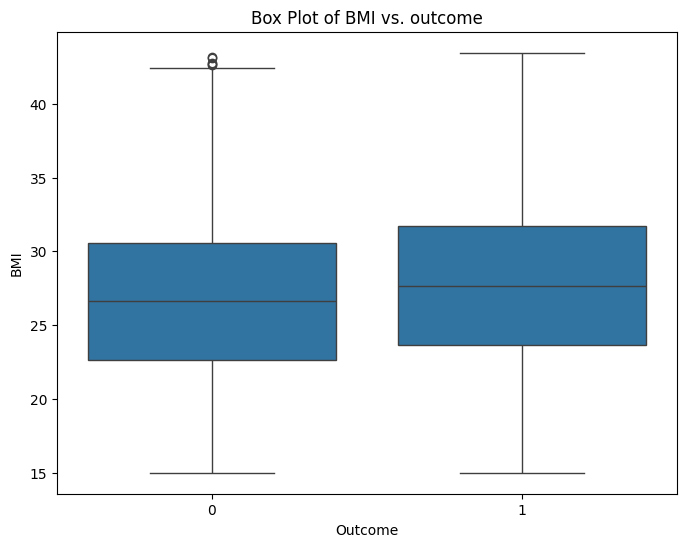

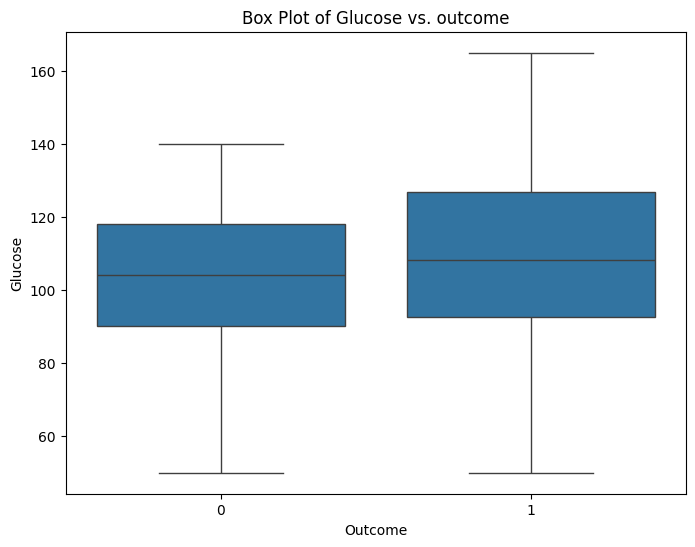

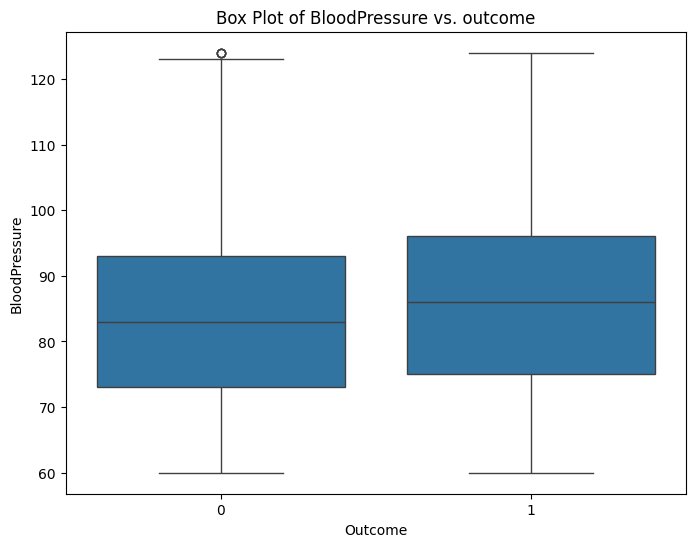

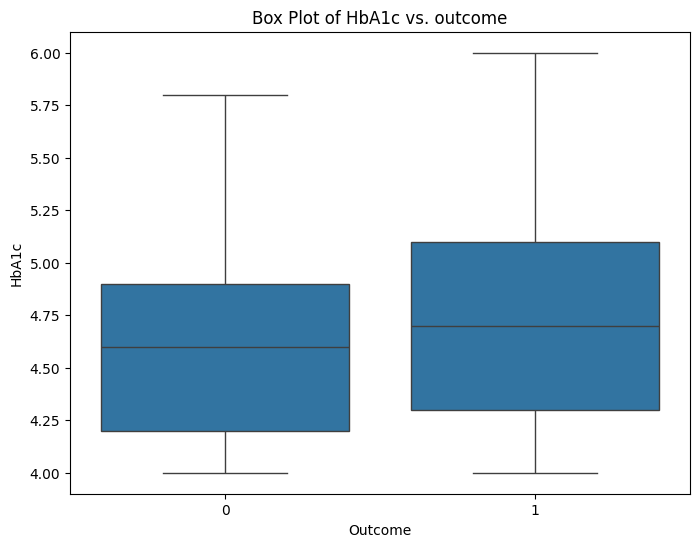

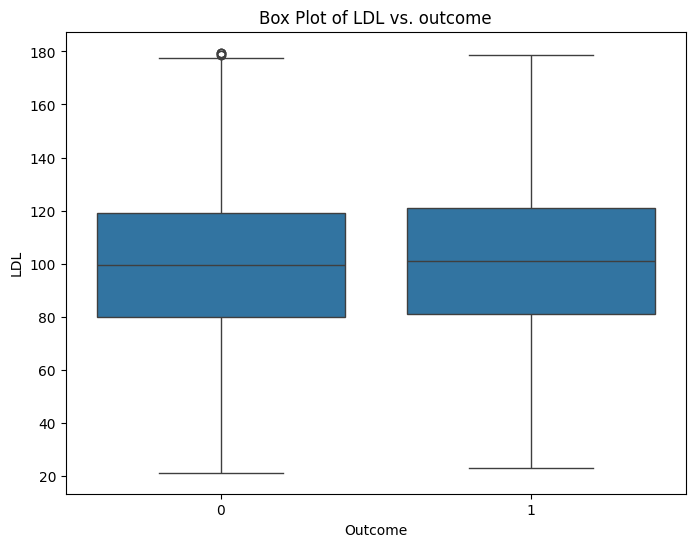

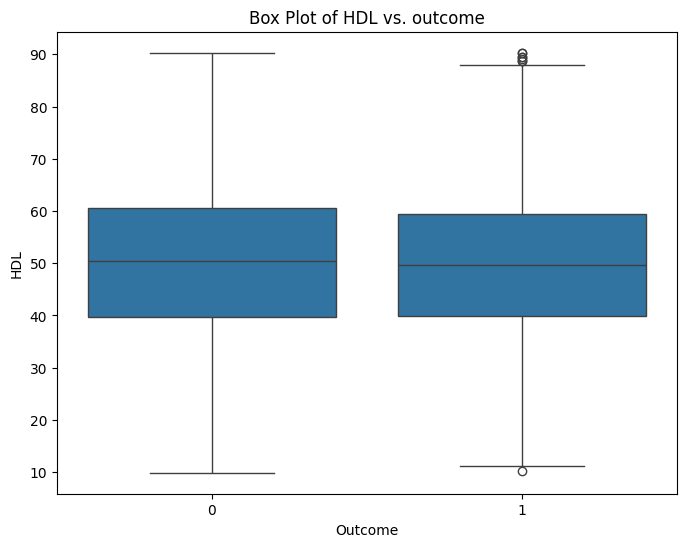

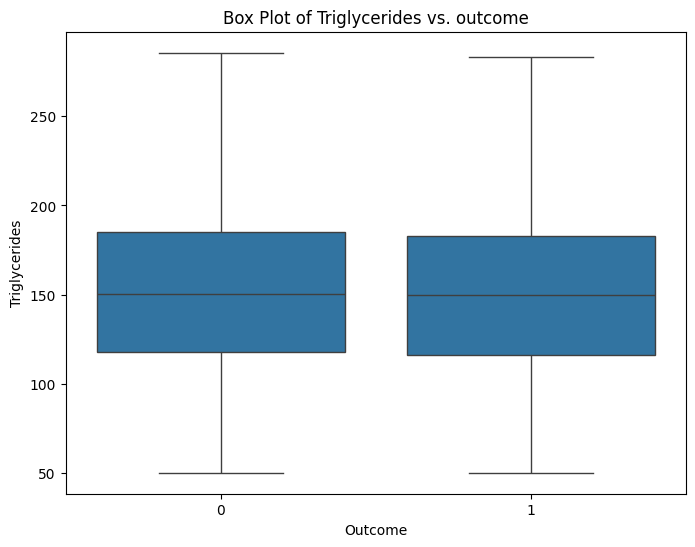

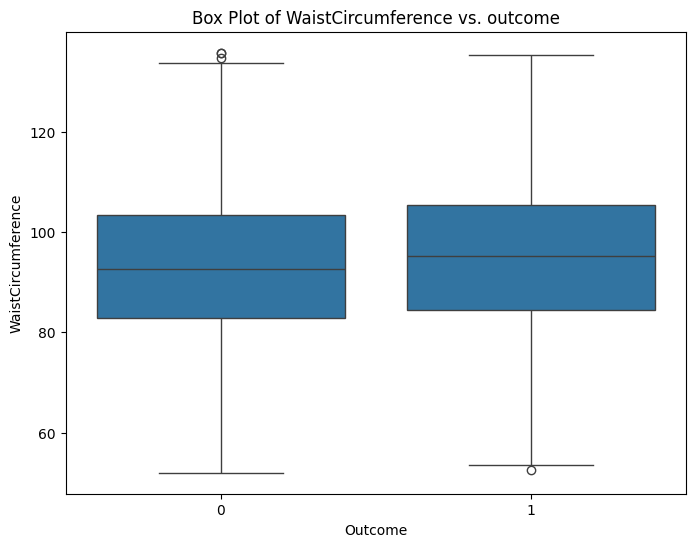

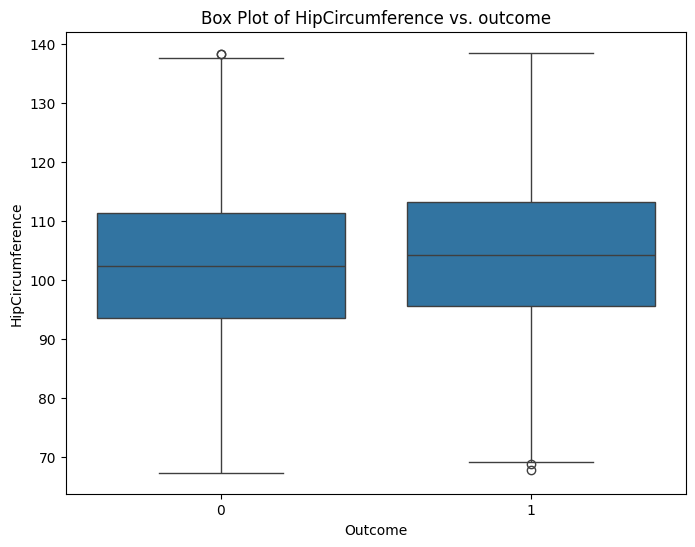

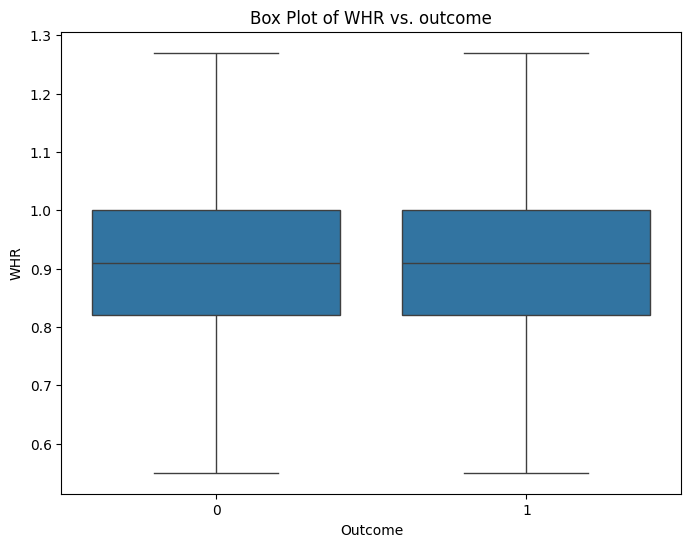

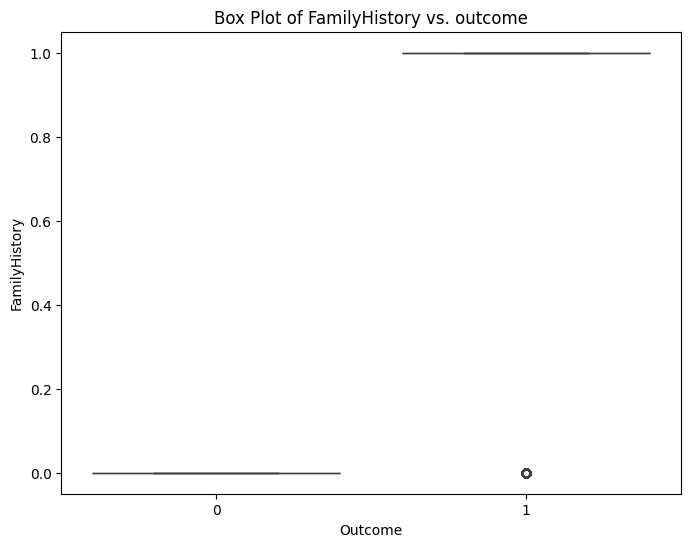

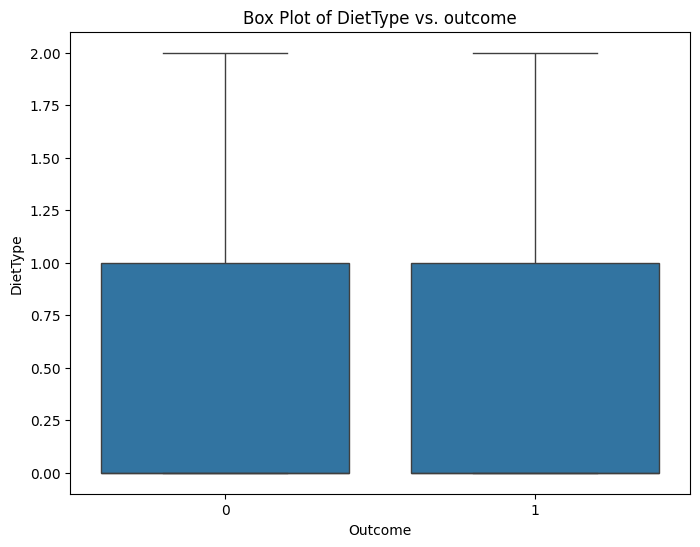

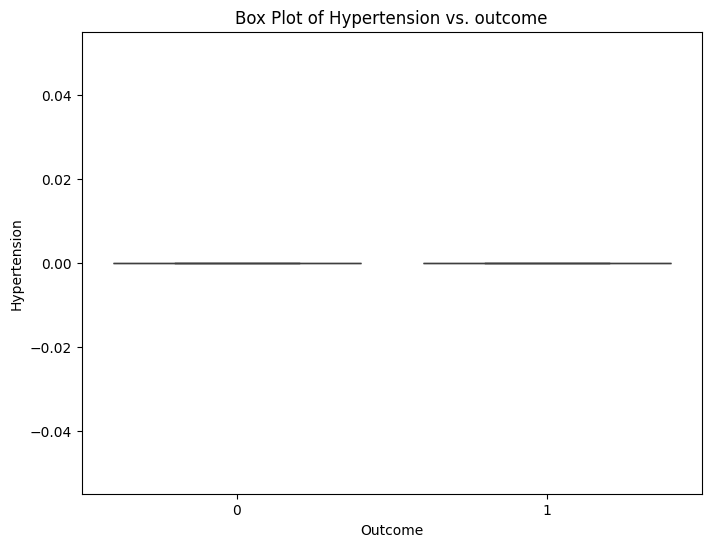

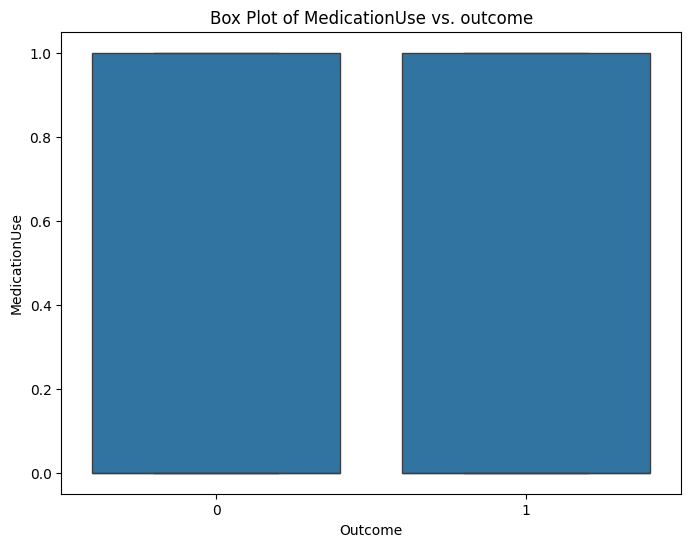

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
numerical_features = ['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 'Triglycerides', 'WaistCircumference','HipCircumference','WHR','FamilyHistory','DietType','Hypertension','MedicationUse']
def handle_outliers_iqr_iterative(df, column, iterations=3):
    for _ in range(iterations):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
for feature in numerical_features:
    df= handle_outliers_iqr_iterative(df, feature)
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=feature, data=df, showfliers=True)
    plt.title(f'Box Plot of {feature} vs. outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.show()


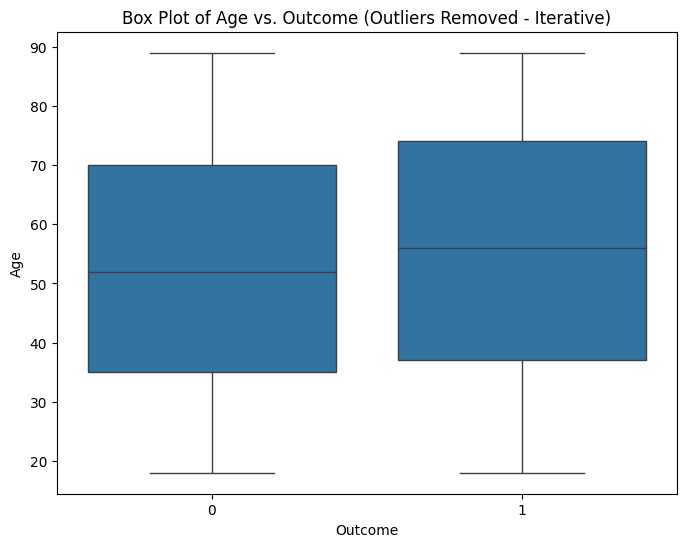

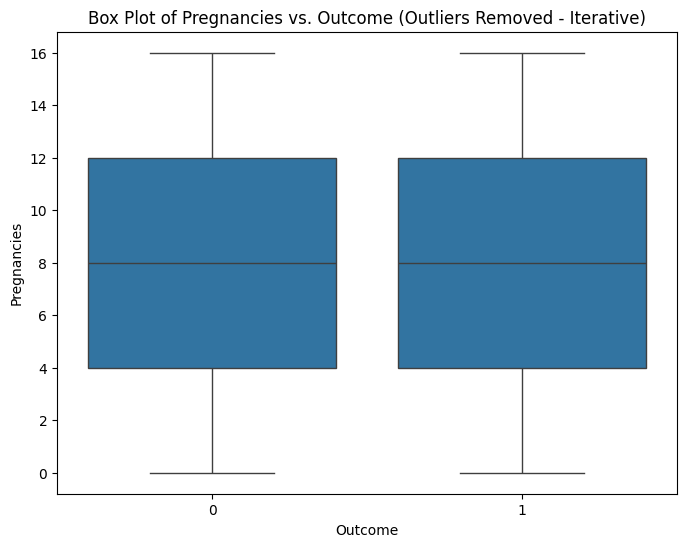

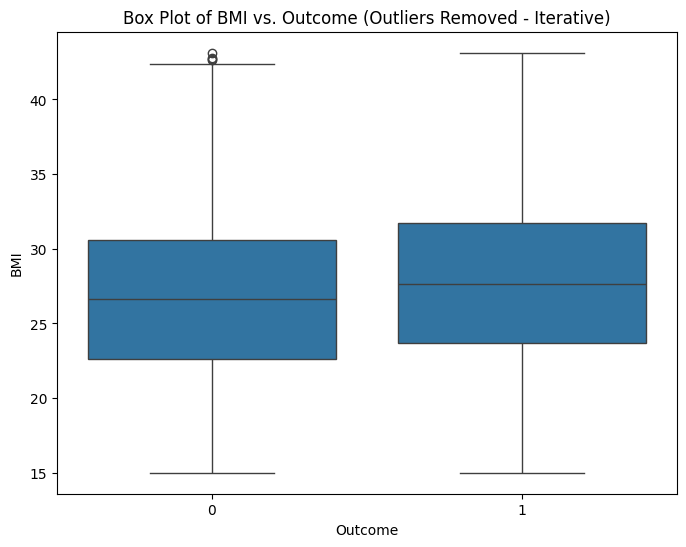

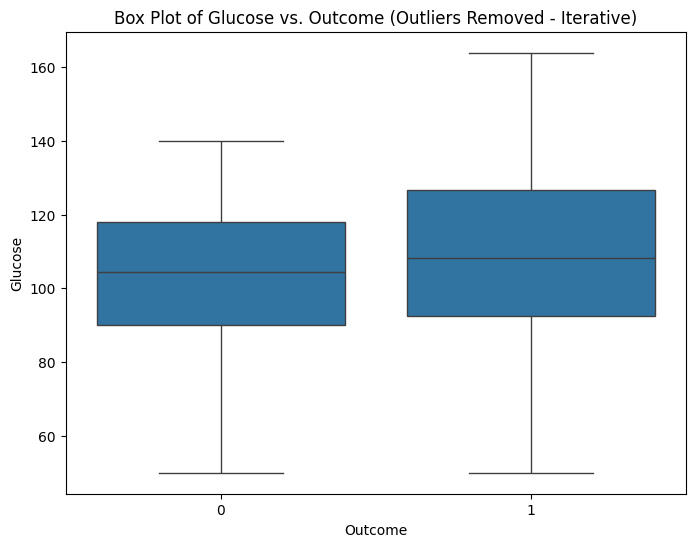

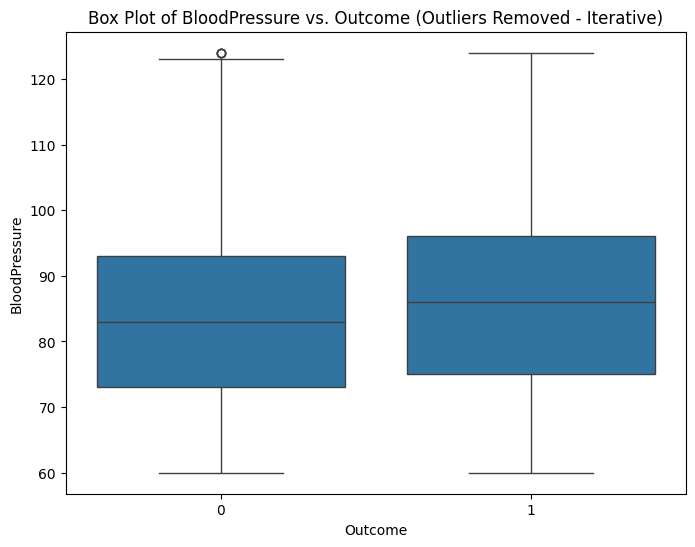

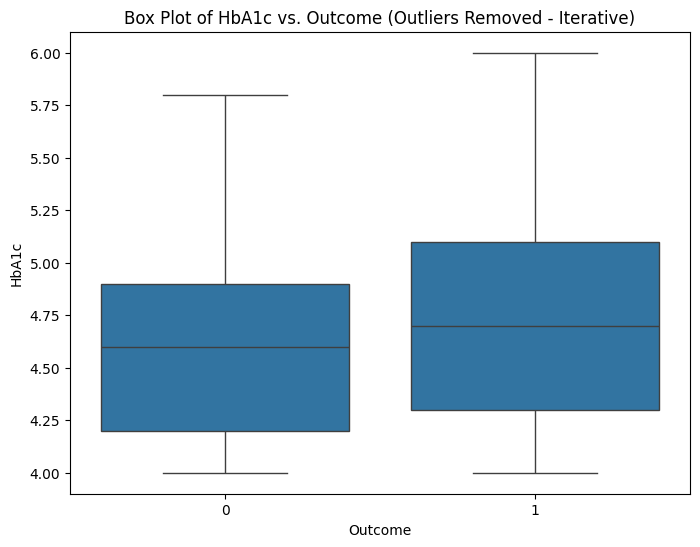

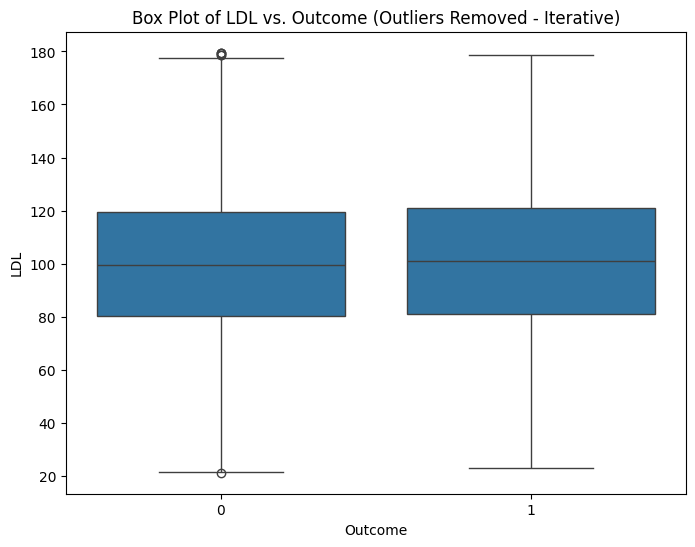

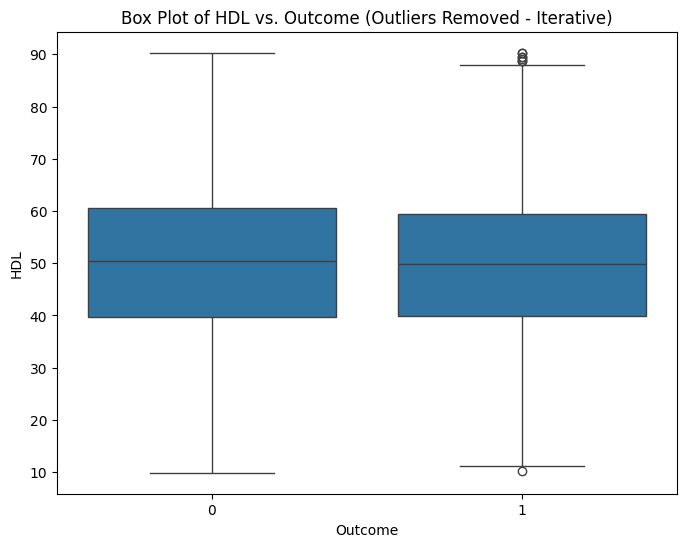

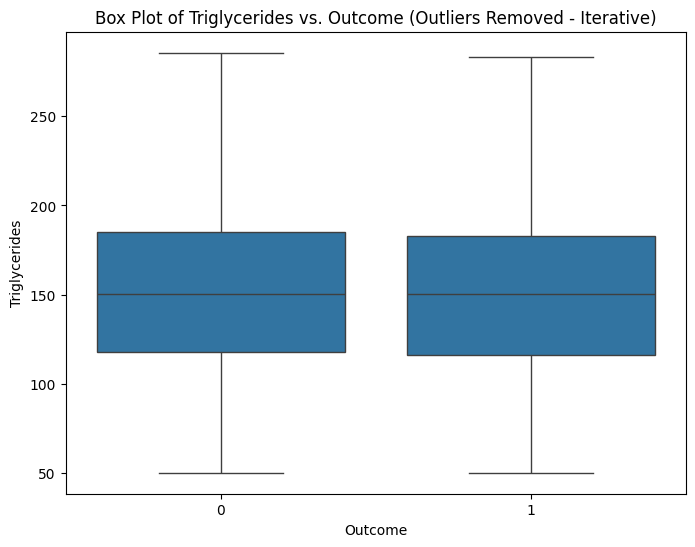

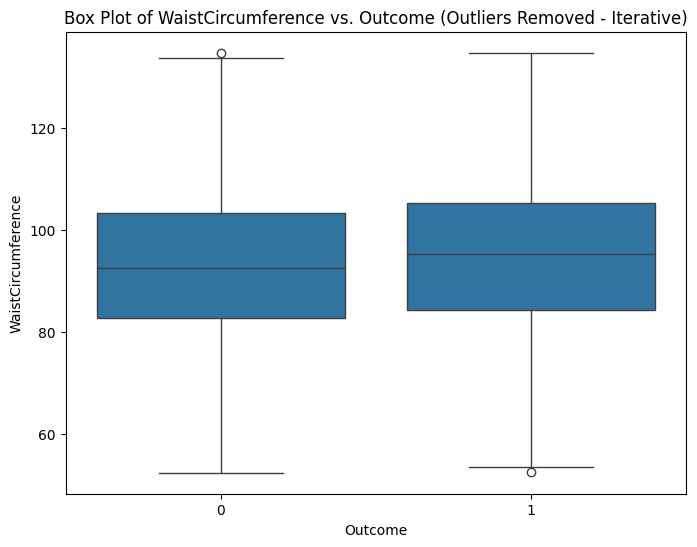

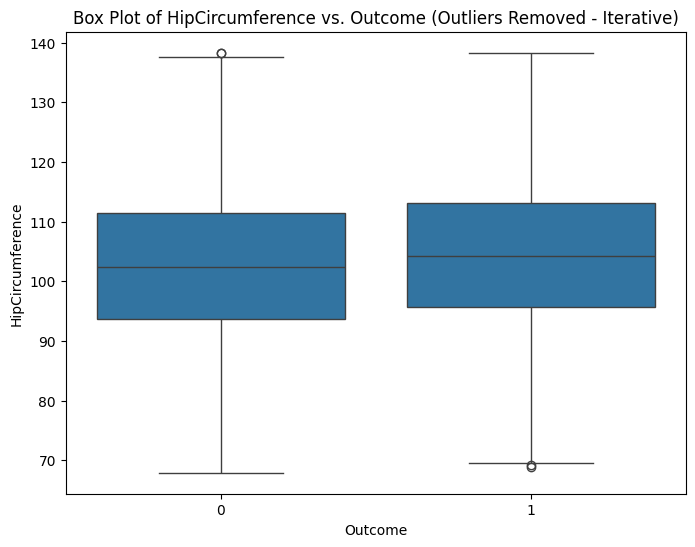

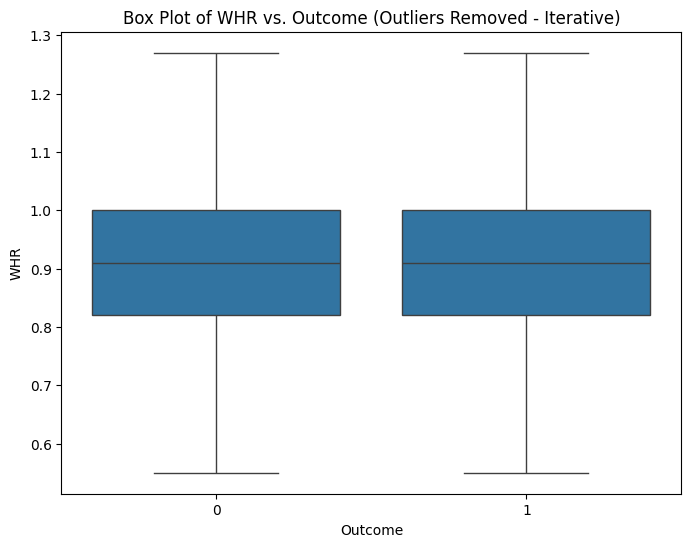

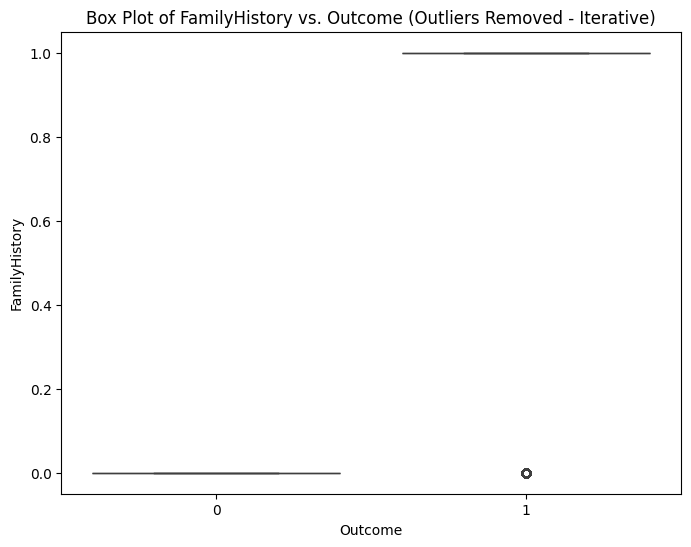

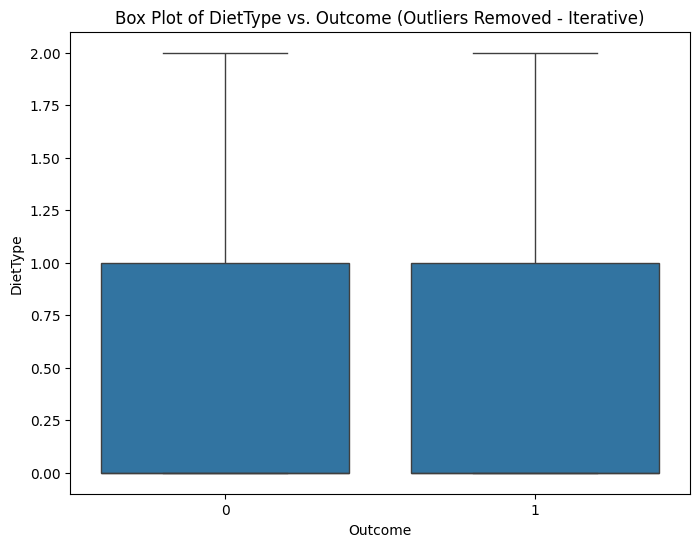

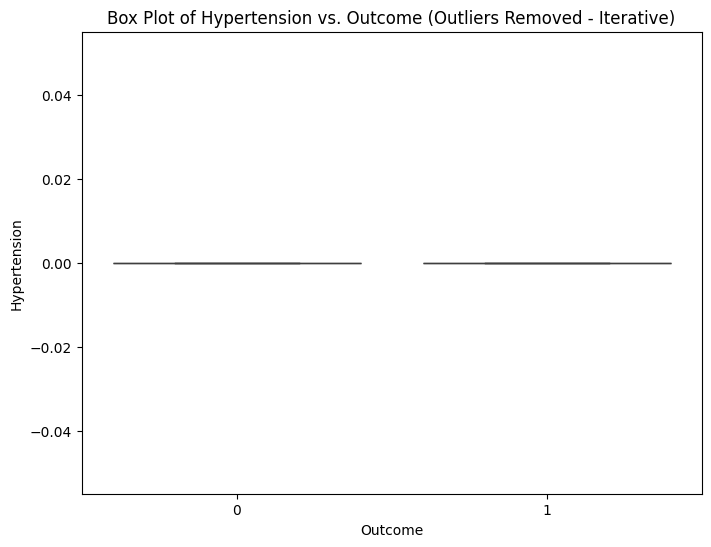

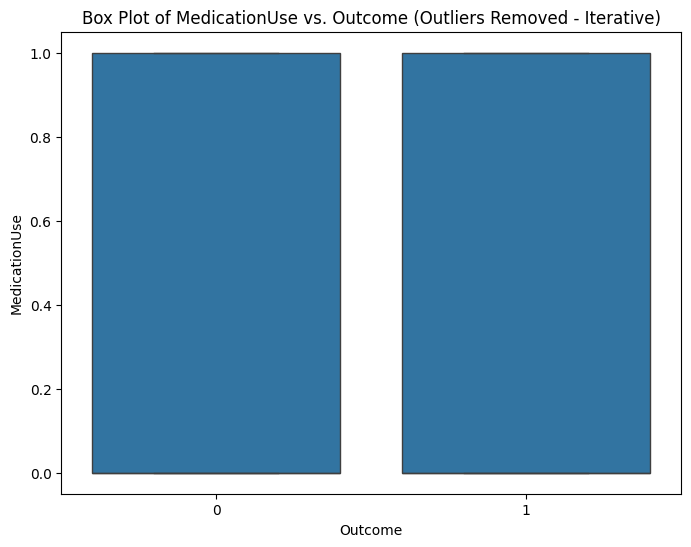

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
numerical_features = ['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 'Triglycerides', 'WaistCircumference','HipCircumference','WHR','FamilyHistory','DietType','Hypertension','MedicationUse']
def handle_outliers_iqr_iterative(df, column, iterations=3):
    for _ in range(iterations):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

a = df.copy()
for feature in numerical_features:
    a = handle_outliers_iqr_iterative(a, feature)
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=feature, data=a, showfliers=True)
    plt.title(f'Box Plot of {feature} vs. Outcome (Outliers Removed - Iterative)')
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.show()


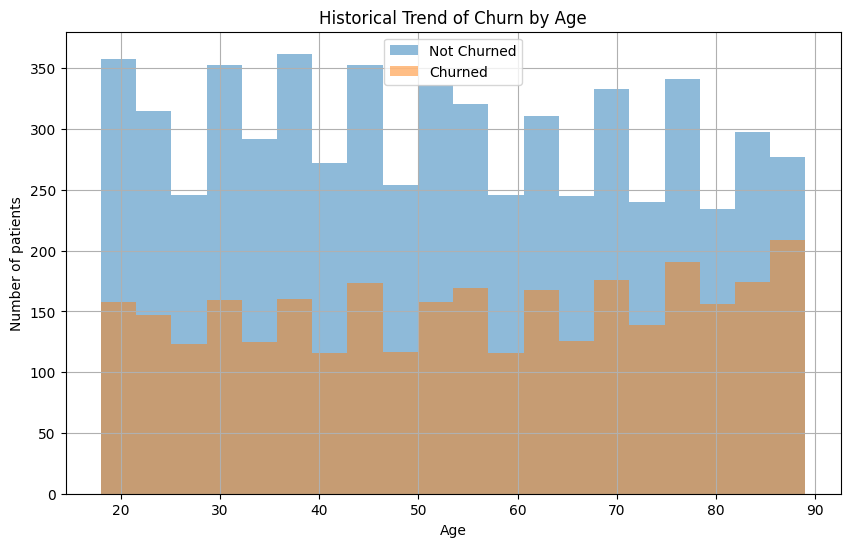

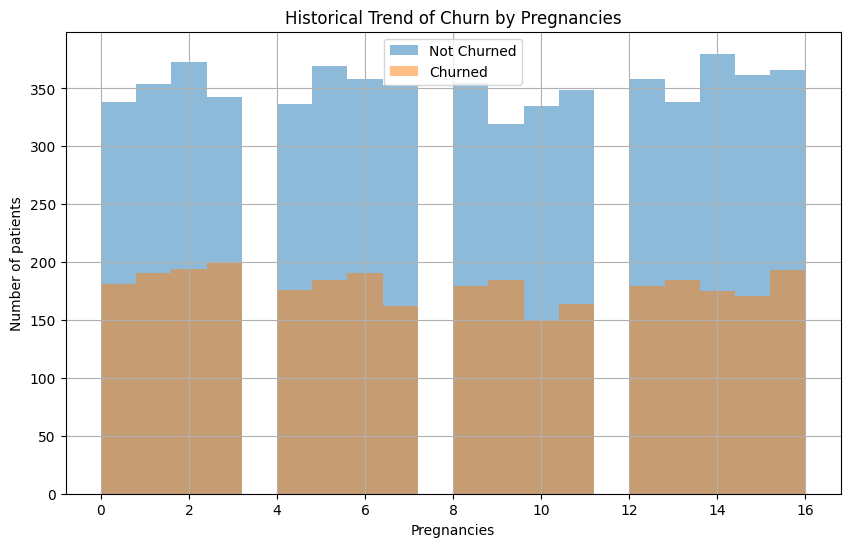

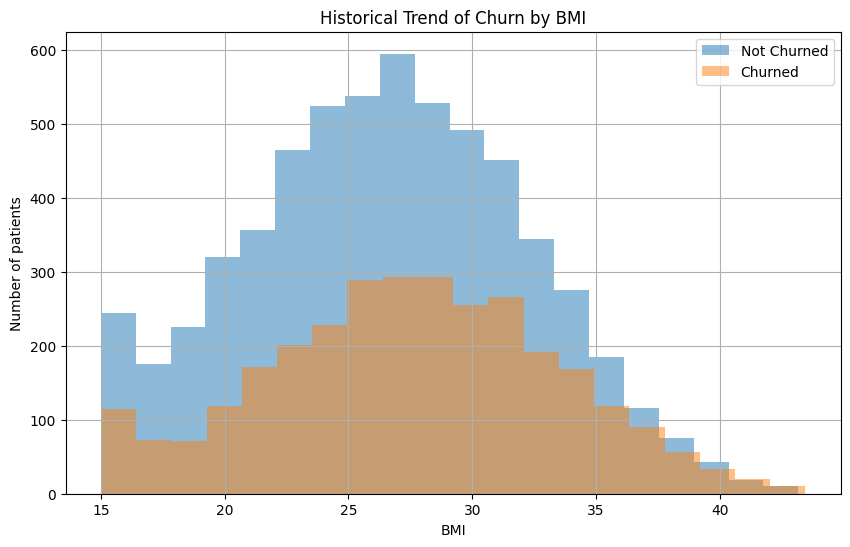

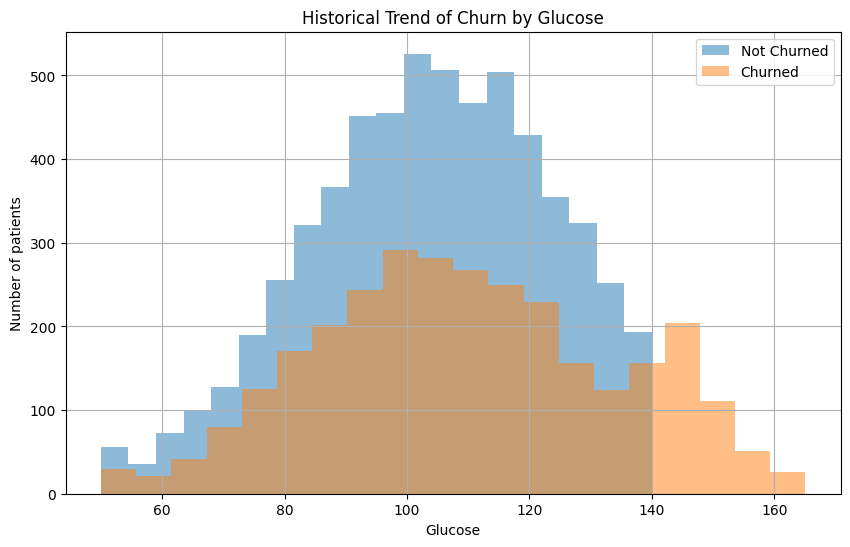

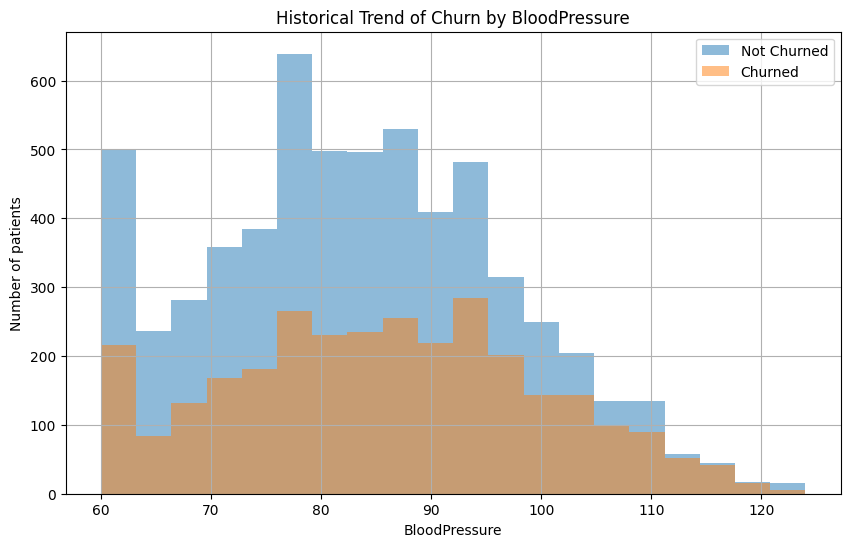

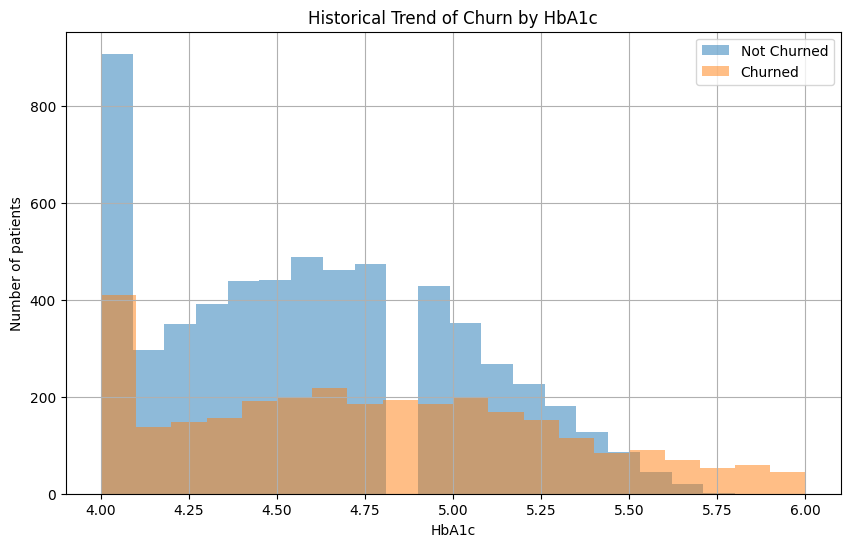

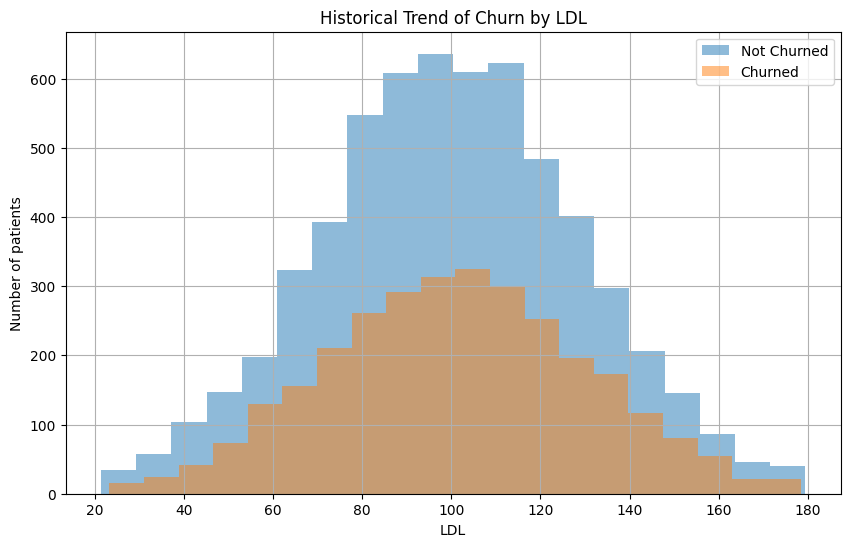

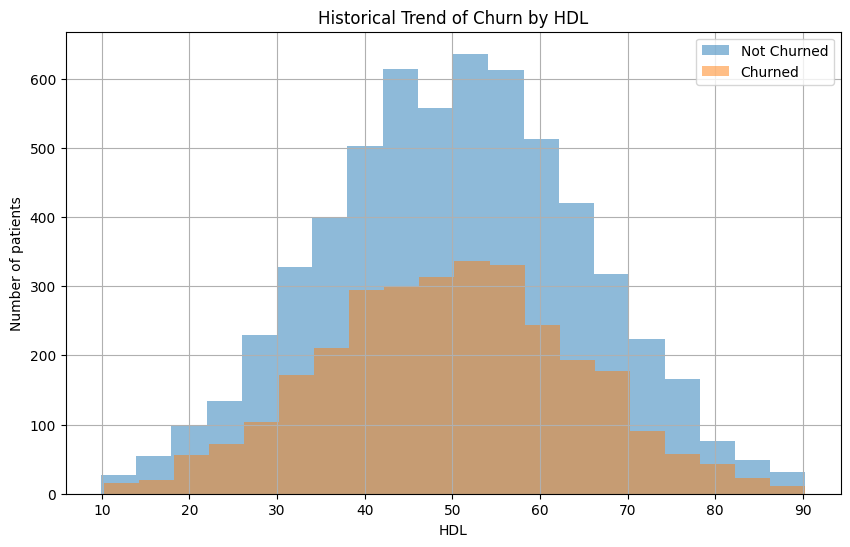

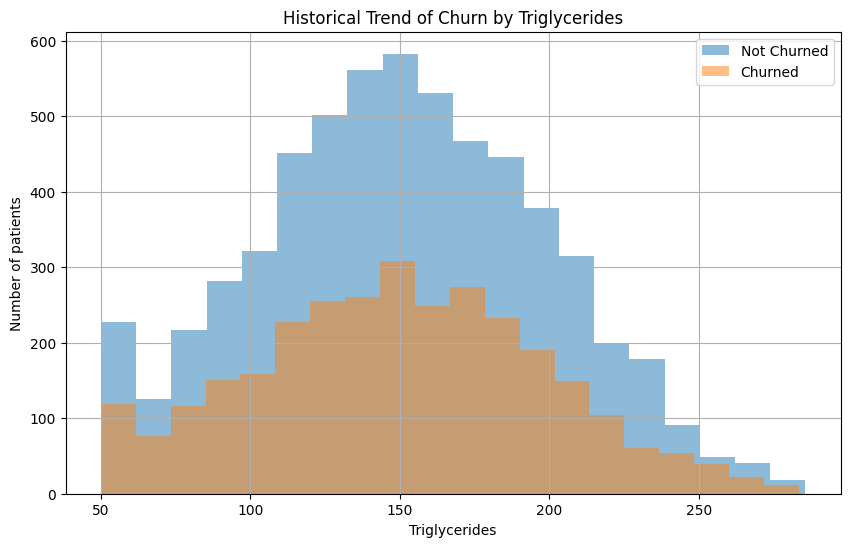

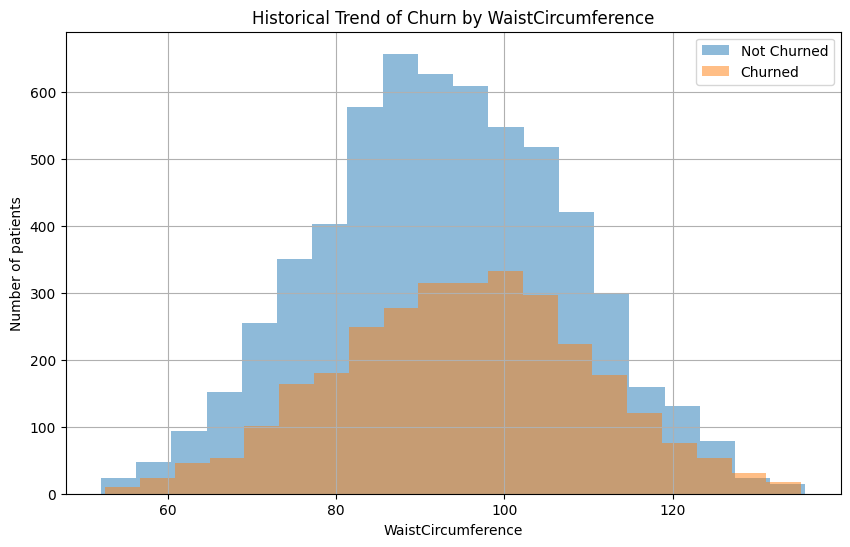

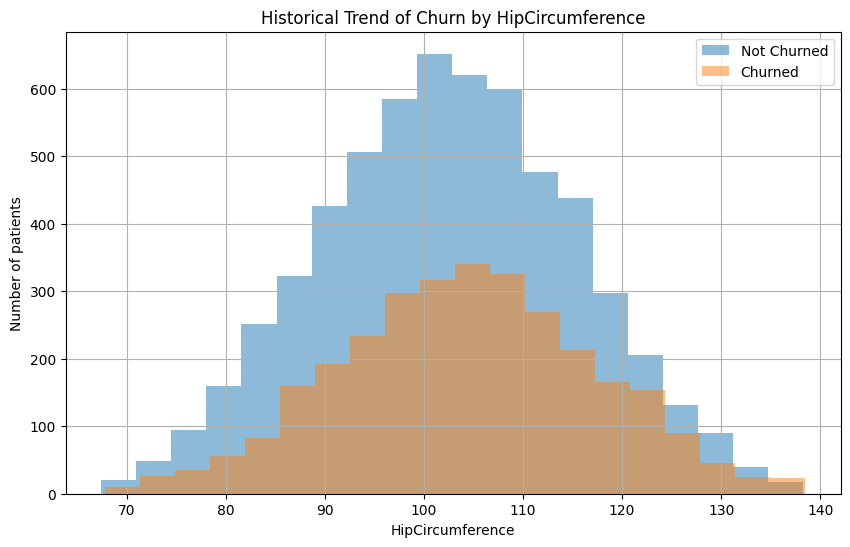

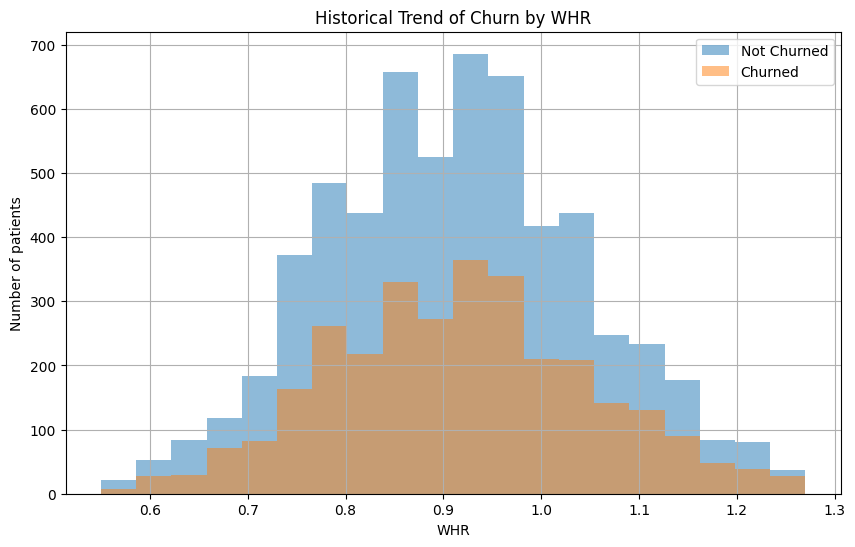

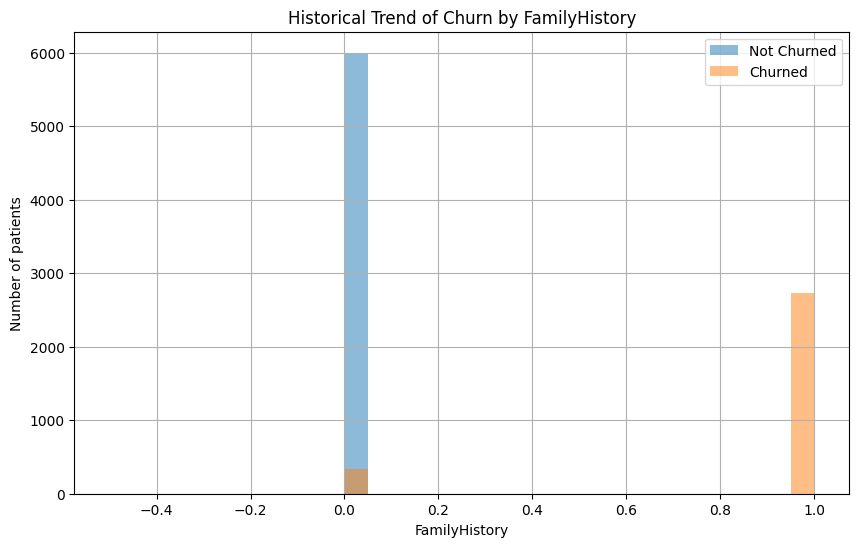

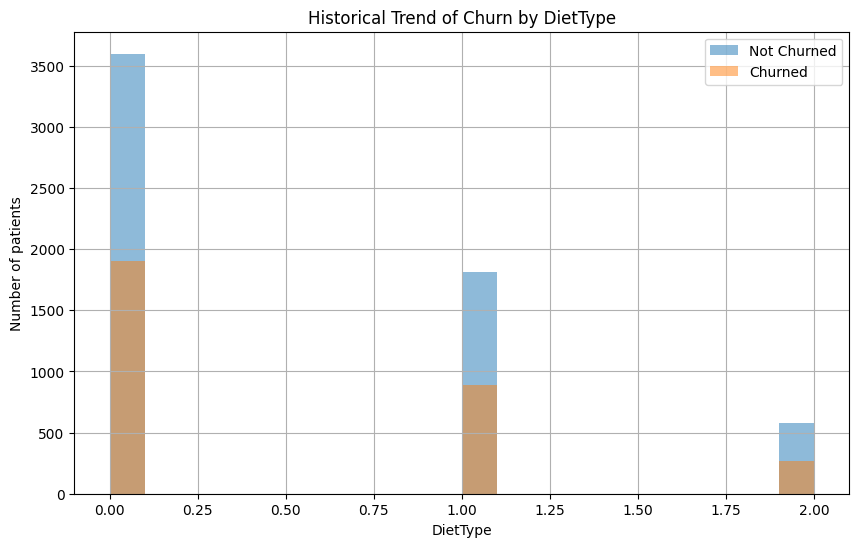

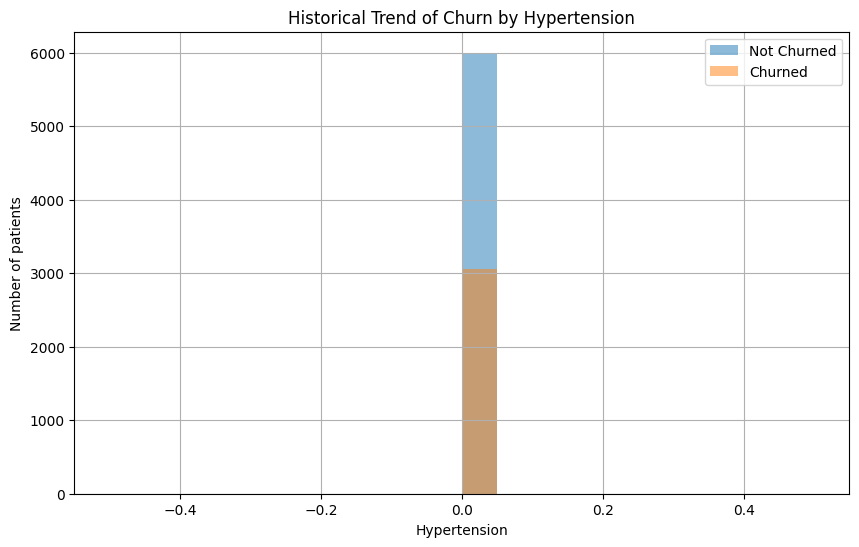

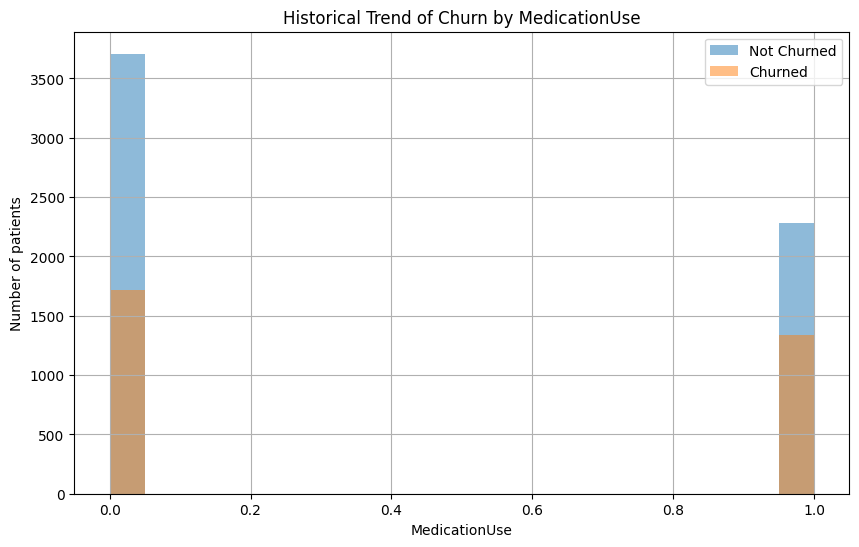

In [ ]:
numerical_features =['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 'Triglycerides', 'WaistCircumference','HipCircumference','WHR','FamilyHistory','DietType','Hypertension','MedicationUse']
for feature in numerical_features:

    churn_data = df[[feature, 'Outcome']]


    plt.figure(figsize=(10, 6))
    plt.hist(churn_data[churn_data['Outcome'] == 0][feature], bins=20, alpha=0.5, label='Not Churned')
    plt.hist(churn_data[churn_data['Outcome'] == 1][feature], bins=20, alpha=0.5, label='Churned')

    plt.title(f'Historical Trend of Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of patients')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = a.drop('Outcome', axis=1)
y = a['Outcome']
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
5      41           10  17.47     67.0           71.0    4.2  105.3  58.8   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference  HipCircumference   WHR  \
0       

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'🔹 Accuracy: {accuracy:.2f}')
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 0.97

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1181
           1       0.98      0.93      0.95       625

    accuracy                           0.97      1806
   macro avg       0.97      0.96      0.97      1806
weighted avg       0.97      0.97      0.97      1806



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


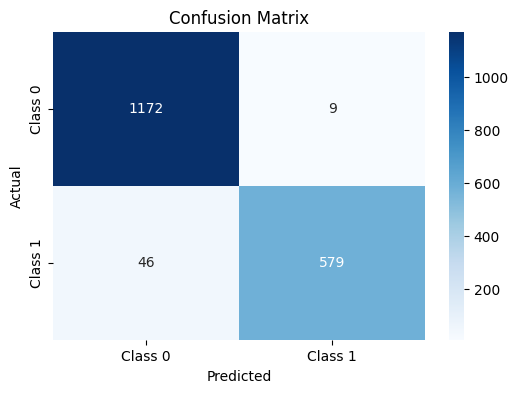

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from scipy.stats import skew
for column in df.select_dtypes(include=['number']).columns:
    skewness = skew(df[column])
    print(f"Skewness of {column}: {skewness}")

Skewness of Age: 0.01293399385004002
Skewness of Pregnancies: 0.016908160479113834
Skewness of BMI: 0.016887379420750262
Skewness of Glucose: -0.04080610117470963
Skewness of BloodPressure: 0.17965443966650313
Skewness of HbA1c: 0.37544166194528833
Skewness of LDL: 0.01790878962713515
Skewness of HDL: -0.006139766276064458
Skewness of Triglycerides: 0.046118615389038185
Skewness of WaistCircumference: -0.002221370212880102
Skewness of HipCircumference: 0.0012675417519169817
Skewness of WHR: 0.1015325842557379
Skewness of FamilyHistory: 0.8654781520145205
Skewness of DietType: 1.0259208516101497
Skewness of Hypertension: nan
Skewness of MedicationUse: 0.408624355145649
Skewness of Outcome: 0.6838445342895636


In [ ]:
from scipy.stats import kurtosis
for column in df.select_dtypes(include=['number']).columns:
    kurt = kurtosis(df[column])
    print(f"Kurtosis of {column}: {kurt}")

Kurtosis of Age: -1.2063863326035218
Kurtosis of Pregnancies: -1.231064137560812
Kurtosis of BMI: -0.4248888284553045
Kurtosis of Glucose: -0.3216233297603992
Kurtosis of BloodPressure: -0.5407056995180763
Kurtosis of HbA1c: -0.593670019877413
Kurtosis of LDL: -0.2569586616240933
Kurtosis of HDL: -0.30506305849464077
Kurtosis of Triglycerides: -0.42573500183249413
Kurtosis of WaistCircumference: -0.3256740171706016
Kurtosis of HipCircumference: -0.3201673605774693
Kurtosis of WHR: -0.2643893592094453
Kurtosis of FamilyHistory: -1.2509475683855305
Kurtosis of DietType: -0.1351382772405474
Kurtosis of Hypertension: nan
Kurtosis of MedicationUse: -1.8330261363818026
Kurtosis of Outcome: -1.5323566529222892


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00       625

    accuracy                           1.00      1806
   macro avg       1.00      1.00      1.00      1806
weighted avg       1.00      1.00      1.00      1806


Confusion Matrix:
 [[1181    0]
 [   0  625]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X = df[['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 'Triglycerides', 'WaistCircumference','HipCircumference','WHR','FamilyHistory','DietType','Hypertension','MedicationUse']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7731 - loss: 0.5823
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.1815
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.1148
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9707 - loss: 0.0829
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.0859
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9740 - loss: 0.0745
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0693
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0685
Epoch 9/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0632
Epoch 10/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9789 - loss: 0.0559
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.0472
Test Loss: 0.0478
Test Accuracy: 0.9790


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear')
# X_train and X_test are already NumPy arrays, so no need to use .values
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)
svm_model.fit(X_train_2d, y_train)

y_pred = svm_model.predict(X_test_2d)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svm_accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1201
           1       1.00      0.98      0.99       609

    accuracy                           0.99      1810
   macro avg       0.99      0.99      0.99      1810
weighted avg       0.99      0.99      0.99      1810


Confusion Matrix:
 [[1201    0]
 [  15  594]]


In [ ]:
import xgboost as xgb
X = df[['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 'Triglycerides', 'WaistCircumference','HipCircumference','WHR','FamilyHistory','DietType','Hypertension','MedicationUse']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      1.00      1.00       609

    accuracy                           1.00      1810
   macro avg       1.00      1.00      1.00      1810
weighted avg       1.00      1.00      1.00      1810


Confusion Matrix:
 [[1201    0]
 [   1  608]]


In [ ]:
import pandas as pd

data = {
    'Model': ['SVM', 'RandomForest', 'XGBoost', 'LSTM'],
    'Accuracy': [0.99, 0.1, 0.1, 0.97]
}

comparison_df = pd.DataFrame(data)
best_model_index = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_index, 'Model']

print(f"The best-performing model is: {best_model}")

The best-performing model is: SVM


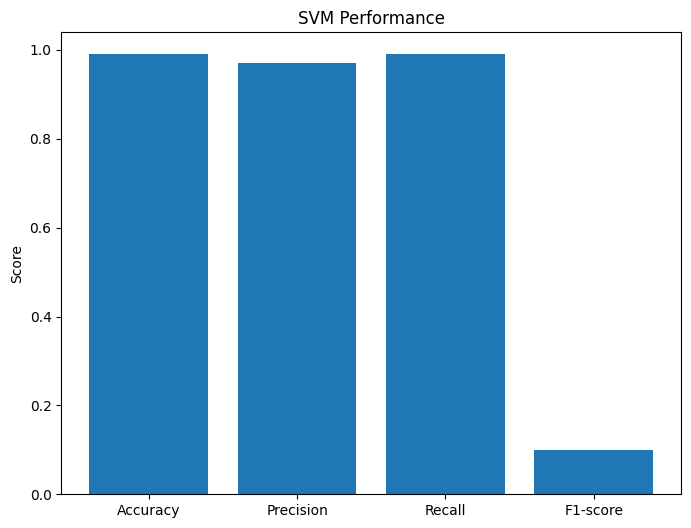

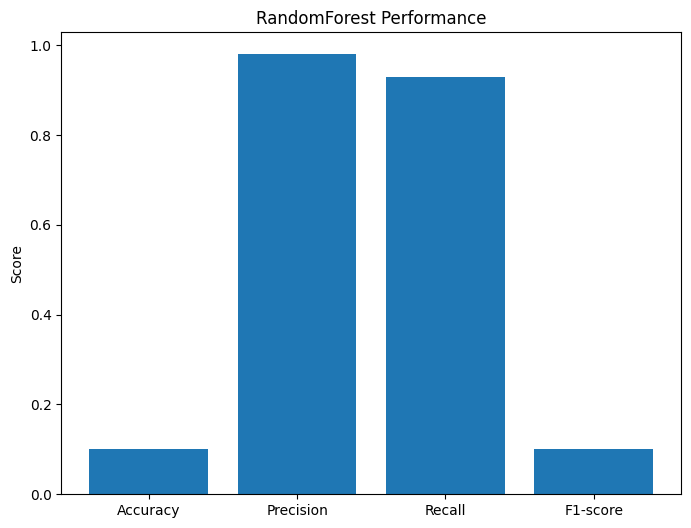

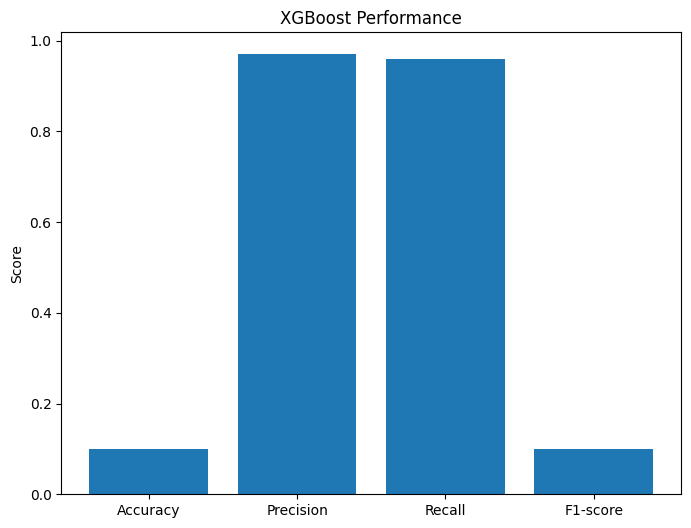

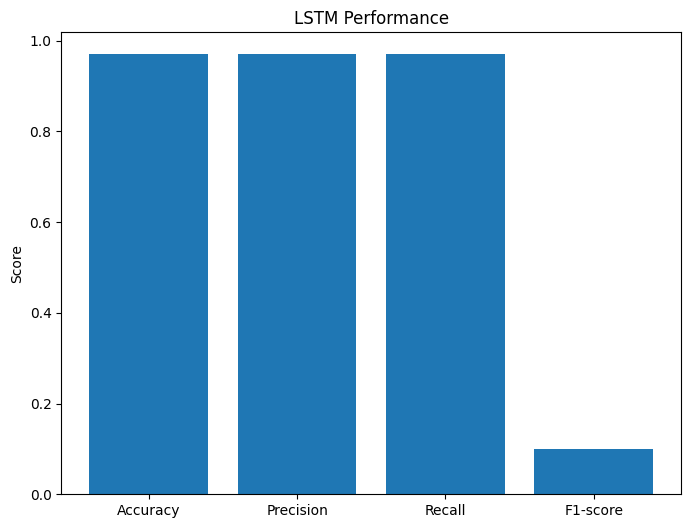

The best-performing model is: SVM


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = {
    'Model': ['SVM', 'RandomForest', 'XGBoost', 'LSTM'],
    'Accuracy': [0.99, 0.1, 0.1, 0.97],
    'Precision': [0.97,0.98,0.97,0.97],
    'Recall': [0.99,0.93,0.96,0.97],
    'F1-score': [0.1,0.1,0.1,0.1]
}
comparison_df = pd.DataFrame(data)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for model in comparison_df['Model']:
    fig, ax = plt.subplots(figsize=(8, 6))
    model_data = comparison_df[comparison_df['Model'] == model][metrics].values.flatten()
    ax.bar(metrics, model_data)
    ax.set_title(f'{model} Performance')
    ax.set_ylabel('Score')
    plt.show()
best_model_index = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_index, 'Model']

print(f"The best-performing model is: {best_model}")

In [ ]:
import numpy as np
from scipy.stats import norm
def z_test(acc1, acc2, n=200):
    """Performs Z-test between two model accuracies"""
    p1, p2 = acc1, acc2
    p = (p1 + p2) / 2
    se = np.sqrt(p * (1 - p) * (2 / n))
    z = (p1 - p2) / se
    p_value = 1 - norm.cdf(abs(z))
    return z, p_value

models = {'SVM':0.99, 'Random Forest': 0.1, 'XGBoost': 0.1, 'LSTM': 0.97}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nZ-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            z, p = z_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → Z-score: {z:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")


Model Accuracies:
SVM: 0.9000
Random Forest: 0.1000
XGBoost: 0.1000
LSTM: 0.9700

Z-Test Results:
SVM vs Random Forest → Z-score: 16.0000, P-value: 0.0000
SVM vs XGBoost → Z-score: 16.0000, P-value: 0.0000
SVM vs LSTM → Z-score: -2.8395, P-value: 0.0023
Random Forest vs SVM → Z-score: -16.0000, P-value: 0.0000
Random Forest vs XGBoost → Z-score: 0.0000, P-value: 0.5000
Random Forest vs LSTM → Z-score: -17.4428, P-value: 0.0000
XGBoost vs SVM → Z-score: -16.0000, P-value: 0.0000
XGBoost vs Random Forest → Z-score: 0.0000, P-value: 0.5000
XGBoost vs LSTM → Z-score: -17.4428, P-value: 0.0000
LSTM vs SVM → Z-score: 2.8395, P-value: 0.0023
LSTM vs Random Forest → Z-score: 17.4428, P-value: 0.0000
LSTM vs XGBoost → Z-score: 17.4428, P-value: 0.0000

Best Model: LSTM with accuracy 0.9700


In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def t_test(acc1, acc2, n=200):
    """Performs T-test between two model accuracies"""
    sample1 = np.random.binomial(n, acc1, size=1000) / n
    sample2 = np.random.binomial(n, acc2, size=1000) / n
    t_stat, p_value = ttest_ind(sample1, sample2)
    return t_stat, p_value

models = {'SVM': 0.99, 'Random Forest': 0.1, 'XGBoost': 0.1, 'LSTM': 0.97}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

print("\nT-Test Results:")
for model1 in models:
    for model2 in models:
        if model1 != model2:
            t, p = t_test(models[model1], models[model2])
            print(f"{model1} vs {model2} → T-score: {t:.4f}, P-value: {p:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")



Model Accuracies:
SVM: 0.9900
Random Forest: 0.1000
XGBoost: 0.1000
LSTM: 0.9700

T-Test Results:
SVM vs Random Forest → T-score: 1277.2053, P-value: 0.0000
SVM vs XGBoost → T-score: 1246.7722, P-value: 0.0000
SVM vs LSTM → T-score: 45.6736, P-value: 0.0000
Random Forest vs SVM → T-score: -1253.8565, P-value: 0.0000
Random Forest vs XGBoost → T-score: -2.3054, P-value: 0.0212
Random Forest vs LSTM → T-score: -1116.1358, P-value: 0.0000
XGBoost vs SVM → T-score: -1249.6138, P-value: 0.0000
XGBoost vs Random Forest → T-score: -0.5440, P-value: 0.5865
XGBoost vs LSTM → T-score: -1153.9958, P-value: 0.0000
LSTM vs SVM → T-score: -44.6879, P-value: 0.0000
LSTM vs Random Forest → T-score: 1121.7553, P-value: 0.0000
LSTM vs XGBoost → T-score: 1125.1406, P-value: 0.0000

Best Model: SVM with accuracy 0.9900


In [ ]:
import numpy as np
from scipy.stats import f_oneway

def anova_test(model_accuracies, n=200):
    """Performs one-way ANOVA test between multiple model accuracies"""
    samples = {model: np.random.binomial(n, acc, size=1000) / n for model, acc in model_accuracies.items()}
    f_stat, p_value = f_oneway(*samples.values())  # Perform ANOVA test
    return f_stat, p_value

models = {'SVM': 0.99, 'Random Forest': 0.1, 'XGBoost': 0.1, 'LSTM': 0.97}
best_model = max(models, key=models.get)

print("\nModel Accuracies:")
for model, acc in models.items():
    print(f"{model}: {acc:.4f}")

# Perform ANOVA test
f_stat, p_value = anova_test(models)
print(f"\nANOVA Test Results → F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

print(f"\nBest Model: {best_model} with accuracy {models[best_model]:.4f}")



Model Accuracies:
SVM: 0.9900
Random Forest: 0.1000
XGBoost: 0.1000
LSTM: 0.9700

ANOVA Test Results → F-statistic: 965792.1626, P-value: 0.0000

Best Model: SVM with accuracy 0.9900
